In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import random
import math

#### Two Three Tree 程式碼的網址
https://codereview.stackexchange.com/questions/188305/2-3-tree-in-python

In [4]:
class Node:
    def __init__(self, data, parent=None):
        self.nodeType = 2
        self.d1, self.d2, self.d3 = data, None, None
        self.c1, self.c2, self.c3, self.c4 = None, None, None, None
        self.parent = parent
    def push(self, data):
        if self.nodeType == 2:
            self.nodeType = 3
            self.d1, self.d2 = sorted([self.d1, data])
        elif self.nodeType == 3:
            self.nodeType = 4
            self.d1, self.d2, self.d3 = sorted([self.d1, self.d2, data])
    def split(self):
        # Case O, if there is nothing to do
        if self.nodeType < 4:
            return
        # Case I, splitting when there is no parent
        if self.parent == None:
            leftChild = Node(self.d1, self)
            rightChild = Node(self.d3, self)
            leftChild.c1, leftChild.c2 = self.c1, self.c2
            rightChild.c1, rightChild.c2 = self.c3, self.c4
            self.nodeType = 2
            self.d1, self.d2, self.d3 = self.d2, None, None
            self.c1, self.c2, self.c3, self.c4 = leftChild, rightChild, None, None
        # Case II, when parent is a 2-node
        elif self.parent.nodeType == 2:
            # subcase a: when the current node is the left child of the parent node
            if self == self.parent.c1:
                midChild = Node(self.d3, self.parent)
                midChild.c1, midChild.c2 = self.c3, self.c4
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3 = self.parent.c1, midChild, self.parent.c2
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c1, self.c2, None, None
                self.d1, self.d2, self.d3 = self.d1, None, None
            # subcase b: when the current node is the right child of the parent node
            elif self == self.parent.c2:
                midChild = Node(self.d1, self.parent)
                midChild.c1, midChild.c2 = self.c1, self.c2
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3 = self.parent.c1, midChild, self.parent.c2
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c3, self.c4, None, None
                self.d1, self.d2, self.d3 = self.d3, None, None
        # Case III, when parent is a 3-node
        elif self.parent.nodeType == 3:
            # subcase a: when the current node is the left child of the parent node
            if self == self.parent.c1:
                newNode = Node(self.d3, self.parent)
                newNode.c1, newNode.c2 = self.c3, self.c4
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3, self.parent.c4 = self.parent.c1, newNode, self.parent.c2, self.parent.c3
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c1, self.c2, None, None
                self.d1, self.d2, self.d3 = self.d1, None, None
            # subcase b: when the current node is the middle child of the parent node
            elif self == self.parent.c2:
                newNode = Node(self.d3, self.parent)
                newNode.c1, newNode.c2 = self.c3, self.c4
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3, self.parent.c4 = self.parent.c1, self.parent.c2, newNode, self.parent.c3
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c1, self.c2, None, None
                self.d1, self.d2, self.d3 = self.d1, None, None
            # subcase c: when the current node is the right node of the parent node
            elif self == self.parent.c3:
                newNode = Node(self.d1, self.parent)
                newNode.c1, newNode.c2 = self.c1, self.c2
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3, self.parent.c4 = self.parent.c1, self.parent.c2, newNode, self.parent.c3
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c3, self.c4, None, None
                self.d1, self.d2, self.d3 = self.d3, None, None
            # now recursively split the parent
            self.parent.split()
    def insert(self, data):
        # if this node is a leaf
        if self.c1 == None:
            self.push(data)
            self.split()
        # if this node is not a leaf, and a 2-node
        elif self.nodeType == 2:
            if data < self.d1:
                self.c1.insert(data)
            else:
                self.c2.insert(data)
        # if this node is a 3-node
        elif self.nodeType == 3:
            if data < self.d1:
                self.c1.insert(data)
            elif data > self.d3:
                self.c3.insert(data)
            else:
                self.c2.insert(data)
    def find(self, data):
        # if this node is a leaf
        if self.c1 == None:
            if data in [self.d1, self.d2, self.d3]:
                return True
            else:
                return False
        # if this node is not a leaf, and a 2-node
        elif self.nodeType == 2:
            if data < self.d1:
                self.c1.find(data)
            else:
                self.c2.find(data)
        # if this node is a 3-node
        elif self.nodeType == 3:
            if data < self.d1:
                self.c1.find(data)
            elif data > self.d3:
                self.c3.find(data)
            else:
                self.c2.find(data)

class TwoThreeTree:
    def __init__(self):
        self.isEmpty = True
        self.root = None
    def insert(self, data):
        if self.isEmpty:
            self.isEmpty = False
            self.root = Node(data)
        else:
            self.root.insert(data)
    def find(self, data):
        if self.isEmpty:
            return False
        else:
            self.root.find(data)

In [5]:
T = TwoThreeTree()

In [6]:
T.insert(3)

In [11]:
T.find(3)

#### Two Three Tree Tree Insertion
##### Insertion Time Complexity: O(log n)

In [13]:
t = 20
T = TwoThreeTree()

TInsertTime = list()

for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        T.insert((np.random.randint(1,(2**30)+1)))
    endtime = time.clock()
    TInsertTime.append(endtime - starttime)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [14]:
TInsertTime

[0.01134639999997944,
 0.0224158999999986,
 0.047468700000024455,
 0.09095300000001316,
 0.19669509999999946,
 0.3201495999999793,
 0.5880334000000289,
 1.0420197000000258,
 1.9492824000000155,
 4.174208999999962]

#### 剩餘時間估計


In [15]:
t = len(TInsertTime)
for i in range(0,21):
    if(i>=t):
        TInsertTime.append(TInsertTime[i-2]/TInsertTime[i-3]*TInsertTime[i-1])

#### Two Three Tree Search
##### Search Time Complexity: O(log n)

In [17]:
t = 15

TSearchTime = list()

for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        T.find((np.random.randint(1,(2**30)+1)))
    endtime = time.clock()
    TSearchTime.append(endtime - starttime)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [18]:
TSearchTime

[0.007218100000045524,
 0.022626400000035574,
 0.03203039999993962,
 0.05926130000000285,
 0.1035685999999032]

#### 剩餘時間估計


In [19]:
t = len(TSearchTime)
for i in range(0,21):
    if(i>=t):
        TSearchTime.append(TSearchTime[i-2]/TSearchTime[i-3]*TSearchTime[i-1])

Text(0, 0.5, '時間')

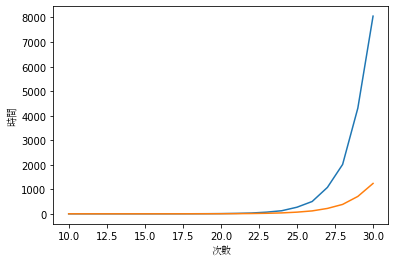

In [20]:
plt.plot(range(10,31),TInsertTime)
plt.plot(range(10,31),TSearchTime)
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')